In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
data = pd.read_csv('wine.csv')
data.describe()
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   class                         178 non-null    int64  
 1   alcohol                       178 non-null    float64
 2   malic_acid                    178 non-null    float64
 3   ash                           178 non-null    float64
 4   alcalinity_of_ash             178 non-null    float64
 5   magnesium                     178 non-null    int64  
 6   total_phenols                 178 non-null    float64
 7   flavanoids                    178 non-null    float64
 8   nonflavanoid_phenols          178 non-null    float64
 9   proanthocyanins               178 non-null    float64
 10  color_intensity               178 non-null    float64
 11  hue                           178 non-null    float64
 12  od280/od315_of_diluted_wines  178 non-null    float64
 13  proli

In [3]:
np.random.seed(42)
datasets = data.copy()
missing_rate =0.2
missing_index = datasets.sample(frac=missing_rate, random_state=42).index
datasets.loc[missing_index, 'class'] = np.nan
datasets.isnull().sum()


class                           36
alcohol                          0
malic_acid                       0
ash                              0
alcalinity_of_ash                0
magnesium                        0
total_phenols                    0
flavanoids                       0
nonflavanoid_phenols             0
proanthocyanins                  0
color_intensity                  0
hue                              0
od280/od315_of_diluted_wines     0
proline                          0
dtype: int64

In [4]:
missing_indices = datasets[datasets['class'].isna()].index
y_TEST = data.loc[missing_indices, 'class']
print(y_TEST)

9      1
12     1
15     1
16     1
18     1
19     1
24     1
29     1
30     1
31     1
41     1
42     1
45     1
55     1
60     2
65     2
66     2
67     2
82     2
90     2
109    2
111    2
113    2
114    2
117    2
118    2
119    2
128    2
140    3
141    3
145    3
150    3
164    3
169    3
171    3
174    3
Name: class, dtype: int64


In [5]:
missing_data = datasets[datasets['class'].isna()]
non_missing_data = datasets[datasets['class'].notna()]



In [6]:
cols = [col for col in datasets.columns if col !='class'] + ['class']
missing_data = missing_data[cols]
non_missing_data = non_missing_data[cols]
non_missing_data

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1.0
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1.0
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1.0
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1.0
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172,14.16,2.51,2.48,20.0,91,1.68,0.70,0.44,1.24,9.70,0.62,1.71,660,3.0
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,3.0
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,3.0
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,3.0


In [7]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, KNNImputer, IterativeImputer
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [8]:
X_complete = non_missing_data.drop(columns=['class'])
y_complete = non_missing_data['class']
X_missing = missing_data.drop(columns=['class'])

# Standardize numerical features (important for k-NN and neural networks)

In [9]:
datasets.info()
datasets.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   class                         142 non-null    float64
 1   alcohol                       178 non-null    float64
 2   malic_acid                    178 non-null    float64
 3   ash                           178 non-null    float64
 4   alcalinity_of_ash             178 non-null    float64
 5   magnesium                     178 non-null    int64  
 6   total_phenols                 178 non-null    float64
 7   flavanoids                    178 non-null    float64
 8   nonflavanoid_phenols          178 non-null    float64
 9   proanthocyanins               178 non-null    float64
 10  color_intensity               178 non-null    float64
 11  hue                           178 non-null    float64
 12  od280/od315_of_diluted_wines  178 non-null    float64
 13  proli

Index(['class', 'alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash',
       'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
       'proanthocyanins', 'color_intensity', 'hue',
       'od280/od315_of_diluted_wines', 'proline'],
      dtype='object')

In [10]:
num_cols = ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash',
       'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
       'proanthocyanins', 'color_intensity', 'hue',
       'od280/od315_of_diluted_wines', 'proline']
scaler = StandardScaler() 
X_complete[num_cols] = scaler.fit_transform(X_complete[num_cols])
X_missing[num_cols] = scaler.transform(X_missing[num_cols])

# 1. Mean/Median Imputation

In [11]:
mean_imputer = SimpleImputer(strategy='mean')
median_imputer = SimpleImputer(strategy='median')
mean_imputed = mean_imputer.fit_transform(y_complete.values.reshape(-1, 1))
median_imputed = median_imputer.fit_transform(y_complete.values.reshape(-1, 1))

In [12]:
missing_data_mean = missing_data.copy()
missing_data_mean['class'] = mean_imputer.transform(missing_data_mean['class'].values.reshape(-1, 1))
missing_data_median = missing_data.copy()
missing_data_median['class'] = median_imputer.transform(missing_data_median['class'].values.reshape(-1, 1))

In [13]:
datasets_mean_filled = pd.concat([non_missing_data, missing_data_mean]).sort_index()
datasets_median_filled = pd.concat([non_missing_data, missing_data_median]).sort_index()

In [14]:
# Imputed cibil_score values for missing rows
mean_pred = mean_imputer.transform(missing_data['class'].values.reshape(-1, 1))
median_pred = median_imputer.transform(missing_data['class'].values.reshape(-1, 1))

In [15]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Flatten predicted values
mean_pred_flat = mean_pred.flatten()
median_pred_flat = median_pred.flatten()
y_true = y_TEST.values

# Mean Imputation Errors
mae_mean = mean_absolute_error(y_true, mean_pred_flat)
rmse_mean = np.sqrt(mean_squared_error(y_true, mean_pred_flat))

# Median Imputation Errors
mae_median = mean_absolute_error(y_true, median_pred_flat)
rmse_median = np.sqrt(mean_squared_error(y_true, median_pred_flat))

# Display results
print("📊 Mean Imputation:")
print(f"MAE: {mae_mean:.2f}, \nRMSE: {rmse_mean:.2f}")

print("\n📊 Median Imputation:")
print(f"MAE: {mae_median:.2f}, \nRMSE: {rmse_median:.2f}")


📊 Mean Imputation:
MAE: 0.62, 
RMSE: 0.77

📊 Median Imputation:
MAE: 0.61, 
RMSE: 0.78


# 2. k-NN Imputation

In [16]:
knn_imputer = KNNImputer(n_neighbors=5)
# Combine features and target for k-NN imputation
knn_data = pd.concat([X_complete, y_complete], axis=1)
knn_imputed = knn_imputer.fit_transform(knn_data)
knn_imputed_scores = knn_imputed[-len(X_missing):, -1]

In [17]:
from sklearn.impute import KNNImputer

# Combine features and target (including missing class values!)
knn_input = datasets.copy()

# Apply KNN Imputer on full data
knn_imputer = KNNImputer(n_neighbors=5)
imputed_array = knn_imputer.fit_transform(knn_input)

# Create imputed DataFrame
imputed_datasets = pd.DataFrame(imputed_array, columns=datasets.columns, index=datasets.index)

# Extract only the imputed cibil_scores for missing rows
datasets.loc[missing_indices, 'class'] = imputed_datasets.loc[missing_indices, 'class']

In [18]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

y_pred = datasets.loc[missing_indices, 'class']
y_true = y_TEST  # original values

mae = mean_absolute_error(y_true, y_pred)
mse = mean_squared_error(y_true, y_pred)
rmse = np.sqrt(mse)

print("📊 KNN Imputation Evaluation:")
print(f"✅ MAE : {mae:.2f}")
print(f"✅ RMSE: {rmse:.2f}")

📊 KNN Imputation Evaluation:
✅ MAE : 0.32
✅ RMSE: 0.54


# 3. MICE Imputation

In [19]:
from sklearn.impute import IterativeImputer
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

# 1. Define MICE Imputer with a stronger estimator
mice_imputer = IterativeImputer(
    estimator=GradientBoostingRegressor(n_estimators=100, random_state=42),
    max_iter=10,
    random_state=42
)

# 2. Combine features + target
mice_data = pd.concat([X_complete, y_complete], axis=1)

# 3. Fit-transform the complete data
mice_imputed = mice_imputer.fit_transform(mice_data)

# 4. Convert back to DataFrame for easy access
mice_imputed_df = pd.DataFrame(mice_imputed, columns=mice_data.columns, index=mice_data.index)

# 5. Train imputer again on full data (optional) and transform missing part
full_data = pd.concat([X_complete, X_missing])
mice_imputer.fit(mice_data)
missing_data_mice = pd.concat([X_missing, pd.Series([np.nan]*len(X_missing), name='class', index=X_missing.index)], axis=1)
mice_imputed_missing = mice_imputer.transform(missing_data_mice)
mice_imputed_scores = mice_imputed_missing[:, -1]



In [20]:
# 6. Evaluate against ground truth
mae_mice = mean_absolute_error(y_TEST, mice_imputed_scores)
rmse_mice = np.sqrt(mean_squared_error(y_TEST, mice_imputed_scores))

print("📊 MICE Imputation Evaluation (with GradientBoostingRegressor):")
print(f"✅ MAE : {mae_mice:.2f}")
print(f"✅ RMSE: {rmse_mice:.2f}")

📊 MICE Imputation Evaluation (with GradientBoostingRegressor):
✅ MAE : 0.12
✅ RMSE: 0.38


# 4. Random Forest Imputation

In [21]:
# Features (X) and target (y) from non-missing data
X = non_missing_data.drop(columns=['class'])
y = non_missing_data['class']

# Features for missing data (to be imputed)
X_missing = missing_data.drop(columns=['class'])

# True values for missing data (y_TEST)
y_true = y_TEST  # Ensure shapes match!

In [22]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [24]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

y_val_pred = model.predict(X_val)
# Calculate MAE and MSE
mae_val = mean_absolute_error(y_val, y_val_pred)
mse_val = mean_squared_error(y_val, y_val_pred)

# Manually calculate RMSE from MSE
rmse_val = np.sqrt(mse_val)

print(f"✅Validation MAE: {mae_val:.2f}")
print(f"✅Validation RMSE: {rmse_val:.2f}")

✅Validation MAE: 0.15
✅Validation RMSE: 0.27


In [25]:
y_missing_pred = model.predict(X_missing)

# Calculate metrics for missing data predictions
mae_missing = mean_absolute_error(y_true, y_missing_pred)
mse_missing = mean_squared_error(y_true, y_missing_pred)
rmse_missing = np.sqrt(mse_missing)

print(f"\n✅Imputation MAE (vs y_TEST): {mae_missing:.2f}")
print(f"✅Imputation RMSE (vs y_TEST): {rmse_missing:.2f}")



✅Imputation MAE (vs y_TEST): 0.09
✅Imputation RMSE (vs y_TEST): 0.19


🔍 Imputation Results Summary:
            Mean  Median  k-NN       MICE  Random Forest
count  36.000000    36.0  36.0  36.000000      36.000000
mean    1.964789     2.0   3.0   1.721086       1.786111
std     0.000000     0.0   0.0   0.699599       0.701579
min     1.964789     2.0   3.0   0.922244       1.000000
25%     1.964789     2.0   3.0   1.003999       1.027500
50%     1.964789     2.0   3.0   1.981352       1.990000
75%     1.964789     2.0   3.0   2.004886       2.197500
max     1.964789     2.0   3.0   3.001905       3.000000


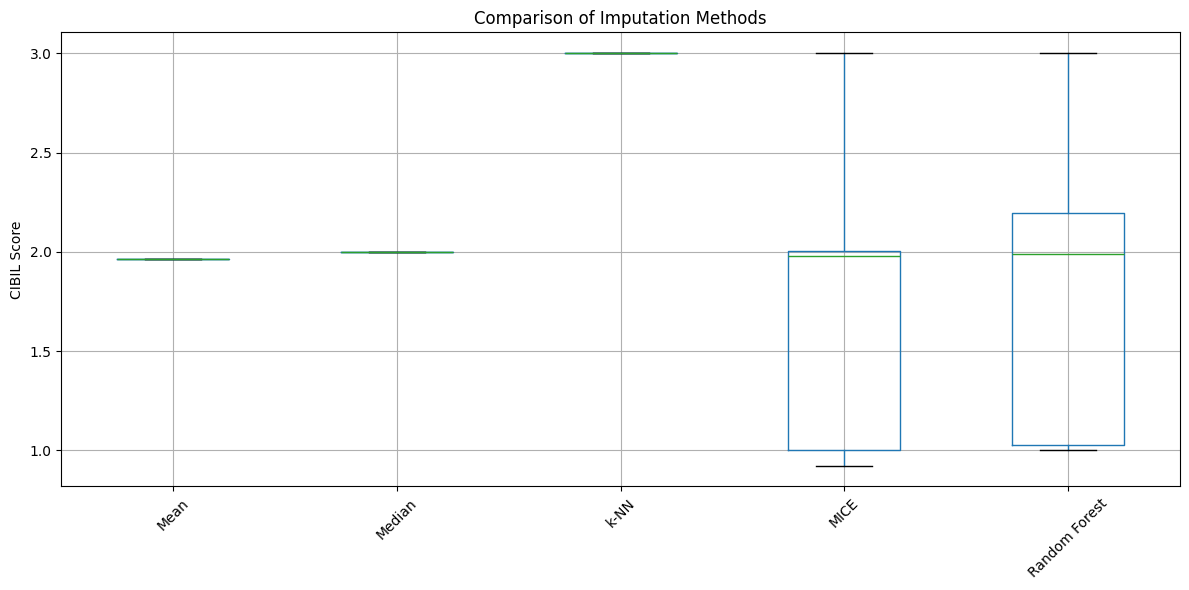

In [26]:
import matplotlib.pyplot as plt
import pandas as pd

# Create a results DataFrame comparing all methods
results = pd.DataFrame({
    'Mean': mean_pred[:len(X_missing)].flatten(),
    'Median': median_pred[:len(X_missing)].flatten(),
    'k-NN': knn_imputed_scores,
    'MICE': mice_imputed_scores,
    'Random Forest': y_missing_pred, 
    
})

# Summary statistics
print("🔍 Imputation Results Summary:")
print(results.describe())

# Visualization using box plot
plt.figure(figsize=(12, 6))
results.boxplot()
plt.title("Comparison of Imputation Methods")
plt.ylabel("CIBIL Score")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


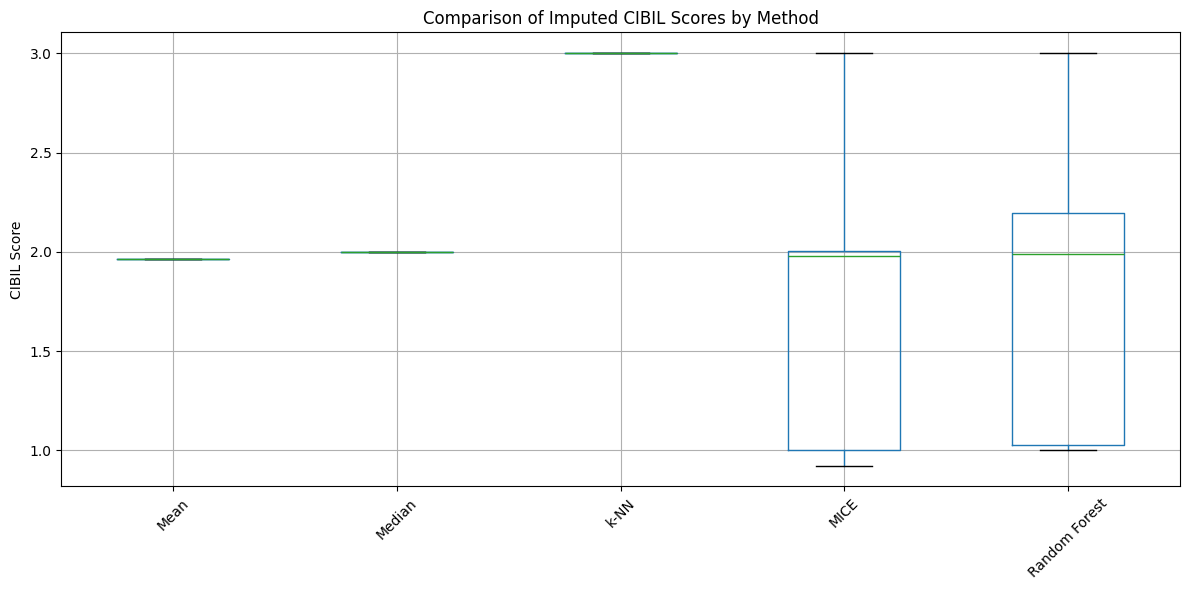

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

# Boxplot for imputed values
plt.figure(figsize=(12, 6))
results.boxplot()
plt.title('Comparison of Imputed CIBIL Scores by Method')
plt.ylabel('CIBIL Score')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


C:\Users\lenovo\AppData\Local\Temp\ipykernel_5636\3425954819.py:26: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_5636\3425954819.py:31: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45)


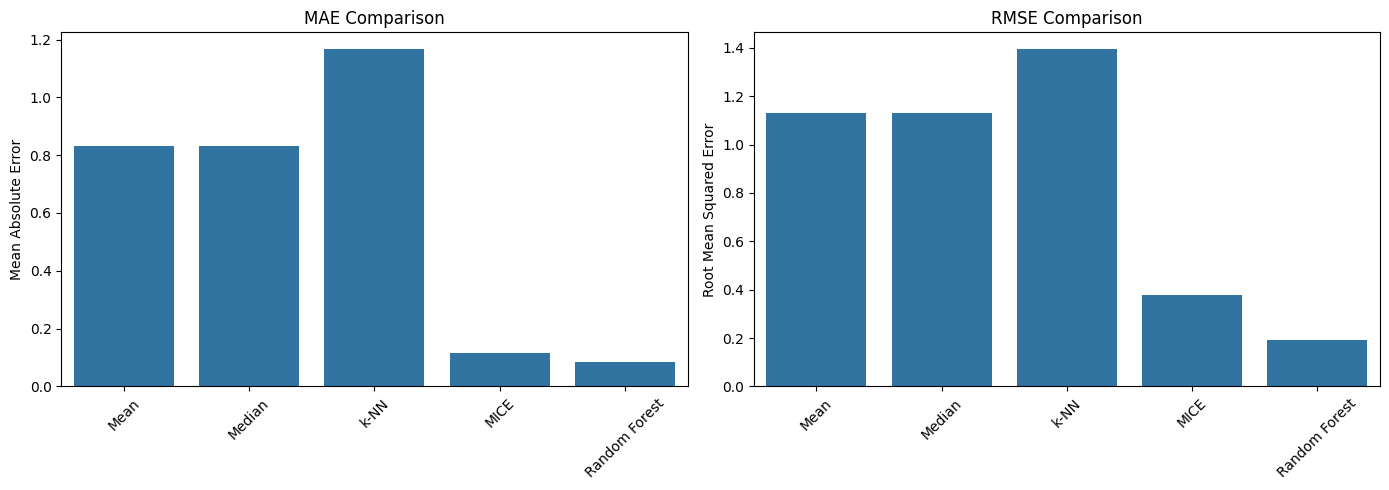

In [28]:
# Define MAE and RMSE values for each model
mae_scores = {
    'Mean': mean_absolute_error(y_TEST, mean_imputed[:len(y_TEST)].flatten()),
    'Median': mean_absolute_error(y_TEST, median_imputed[:len(y_TEST)].flatten()),
    'k-NN': mean_absolute_error(y_TEST, knn_imputed_scores),
    'MICE': mean_absolute_error(y_TEST, mice_imputed_scores),
    'Random Forest': mean_absolute_error(y_TEST, y_missing_pred),
    
}

rmse_scores = {
    'Mean': np.sqrt(mean_squared_error(y_TEST, mean_imputed[:len(y_TEST)].flatten())),
    'Median': np.sqrt(mean_squared_error(y_TEST, median_imputed[:len(y_TEST)].flatten())),
    'k-NN': np.sqrt(mean_squared_error(y_TEST, knn_imputed_scores)),
    'MICE': np.sqrt(mean_squared_error(y_TEST, mice_imputed_scores)),
    'Random Forest': np.sqrt(mean_squared_error(y_TEST, y_missing_pred)),
    
}

# Bar plots for MAE and RMSE
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

sns.barplot(x=list(mae_scores.keys()), y=list(mae_scores.values()), ax=axes[0])
axes[0].set_title('MAE Comparison')
axes[0].set_ylabel('Mean Absolute Error')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45)

sns.barplot(x=list(rmse_scores.keys()), y=list(rmse_scores.values()), ax=axes[1])
axes[1].set_title('RMSE Comparison')
axes[1].set_ylabel('Root Mean Squared Error')
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45)

plt.tight_layout()
plt.show()
